### Bhagyashree Deshpande

# Forecast the CocaCola prices. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from pandas.plotting import lag_plot

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
cocacola_data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
cocacola_data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


## Data Understanding

In [3]:
cocacola_data.shape

(42, 2)

In [4]:
cocacola_data.dtypes

Quarter     object
Sales      float64
dtype: object

In [5]:
cocacola_data.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [6]:
cocacola_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [7]:
cocacola_data.describe(include = 'all')

,Quarter,Sales
count,42,42.000000
unique,42,NaN
top,Q1_86,NaN
freq,1,NaN
mean,NaN,2994.353308
std,NaN,977.930896
min,NaN,1547.818996
25%,NaN,2159.714247
50%,NaN,2782.376999
75%,NaN,3609.250000


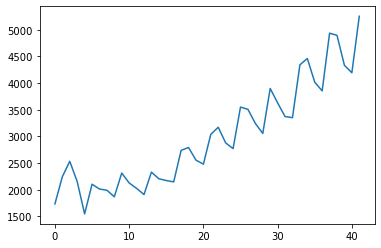

In [8]:
cocacola_data.Sales.plot();

In [9]:
param = pd.read_excel('CocaCola_Sales_Rawdata.xlsx', header = 0, index_col = 0, parse_dates = True, squeeze = True)

In [10]:
cocacola_data['Quarters'] = 0
cocacola_data['Year'] = 0
for i in range(42):
    p = cocacola_data['Quarter'][i]
    cocacola_data['Quarters'][i] = p[0:2]
    cocacola_data['Year'][i] = p[3:5]
cocacola_data.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [11]:
quarter_dummies = pd.DataFrame(pd.get_dummies(cocacola_data['Quarters']))
quarter_dummies.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [12]:
cocacola_data = pd.concat([cocacola_data, quarter_dummies], axis = 1)
cocacola_data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


In [13]:
cocacola_data['time'] = range(1,43)
cocacola_data['time_sqr'] = cocacola_data['time']*cocacola_data['time']

In [14]:
cocacola_data['log_sales'] = np.log(cocacola_data['Sales'])
cocacola_data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,time,time_sqr,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


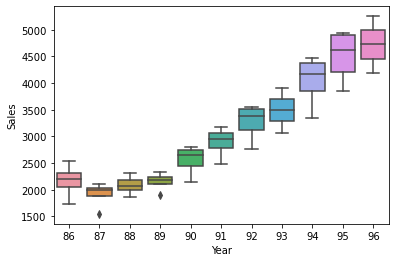

In [15]:
sns.boxplot(x = 'Year', y = 'Sales', data = cocacola_data);

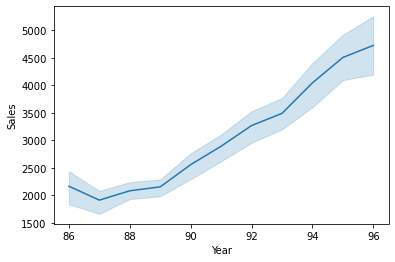

In [16]:
sns.lineplot(x = 'Year', y = 'Sales', data = cocacola_data);

In [17]:
train = cocacola_data.head(30)
test = cocacola_data.tail(15)

### Building the Model driven methods for forecasting

#### Performing Linear Model

In [18]:
linear_model = smf.ols('Sales~time', data = cocacola_data).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['time'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

431.7994415690708

#### Performing an Exponential Model

In [20]:
exp_model = smf.ols('log_sales~time', data = cocacola_data).fit()
pred_exp = pd.Series(exp_model.predict(pd.DataFrame(test['time'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

399.1016083765676

#### Performing a Quadratic Model

In [21]:
quad_model = smf.ols('Sales~time+time_sqr', data = cocacola_data).fit()
pred_quad = pd.Series(quad_model.predict(test[['time','time_sqr']]))
rmse_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_quad))**2))
rmse_quad

378.6445652695619

#### Performing an Additive Seasonality Model

In [22]:
add_sea_model = smf.ols('Sales~Q1+Q2+Q3+Q4', data = cocacola_data).fit()
pred_add_sea = pd.Series(add_sea_model.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1185.6545029195515

#### Performing an Additive Seasonality Quadratic Model

In [23]:
add_sea_quad_model = smf.ols('Sales~time+time_sqr+Q1+Q2+Q3+Q4', data = cocacola_data).fit()
pred_add_sea_quad = pd.Series(add_sea_quad_model.predict(pd.DataFrame(test[['time','time_sqr','Q1','Q2','Q3','Q4']])))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

157.8514583029939

#### Performing a Multiplicative Seasonality Model

In [24]:
mul_sea_model = smf.ols('log_sales~Q1+Q2+Q3+Q4', data = cocacola_data).fit()
pred_mul_sea = pd.Series(mul_sea_model.predict(test))
rmse_mul_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_sea)))**2))
rmse_mul_sea

1311.2517033920026

#### Performing a Multiplicative Additive Seasonality Model

In [26]:
mul_add_model = smf.ols('log_sales~time+Q1+Q2+Q3+Q4', data = cocacola_data).fit()
pred_mul_add = pd.Series(mul_add_model.predict(test))
rmse_mul_add = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_add)))**2))
rmse_mul_add

155.00059044405666

In [27]:
table = {'Model' : pd.Series(['rmse_linear','rmse_exp','rmse_quad','rmse_add_sea','rmse_add_sea_quad','rmse_mul_sea','rmse_mul_add']), 'RMSE Values' : pd.Series([rmse_linear, rmse_exp, rmse_quad, rmse_add_sea, rmse_add_sea_quad, rmse_mul_sea, rmse_mul_add])}
table = pd.DataFrame(table)
table.sort_values(['RMSE Values'])

,Model,RMSE Values
6,rmse_mul_add,155.000590
4,rmse_add_sea_quad,157.851458
2,rmse_quad,378.644565
1,rmse_exp,399.101608
0,rmse_linear,431.799442
3,rmse_add_sea,1185.654503
5,rmse_mul_sea,1311.251703


In [28]:
model_full = smf.ols('Sales~time+time_sqr+Q1+Q2+Q3+Q4', data = cocacola_data).fit()
pred_full = pd.Series(model_full.predict(cocacola_data))

In [29]:
cocacola_data['Predicted_sales'] = pred_full
cocacola_data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,time,time_sqr,log_sales,Predicted_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663,1626.592727
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443,2268.402339
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477,2189.685821
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529,1867.242917
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602,1658.311143


## Conclusion

From all the models listed above, we are getting the lowest RMSE values in Multiplicative Additive Seasonality Model of 155.0005, and thus we build a model to predict using the same model for the whole data.

## =========================================================================

# Forecast the Airlines Passengers. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

## Import Necessary Libraries

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt,ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
airline_data = pd.read_excel('Airlines+Data.xlsx')
airline_data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


## Data Understanding

In [3]:
airline_data.shape

(96, 2)

In [4]:
airline_data.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [5]:
airline_data.isna().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [7]:
airline_data.describe(include = 'all')

,Month,Passengers
count,96,96.000000
unique,96,NaN
top,1995-01-01 00:00:00,NaN
freq,1,NaN
first,1995-01-01 00:00:00,NaN
last,2002-12-01 00:00:00,NaN
mean,NaN,213.708333
std,NaN,71.918216
min,NaN,104.000000
25%,NaN,156.000000


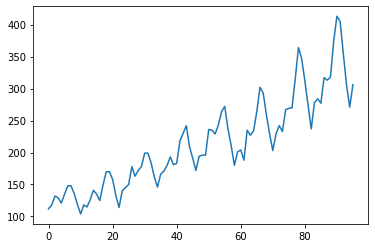

In [9]:
airline_data.Passengers.plot();

In [10]:
temp = pd.read_excel('Airlines+Data.xlsx', header = 0, index_col = 0,parse_dates = True, squeeze = True)

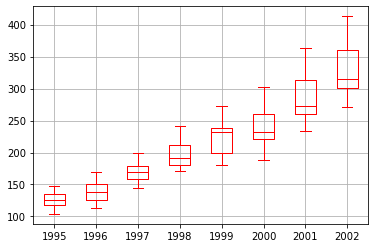

In [11]:
group = temp.groupby(pd.Grouper(freq = 'A'))
years = pd.DataFrame()
for i,j in group:
    years[i.year] = j.values
years.boxplot(color = 'red');

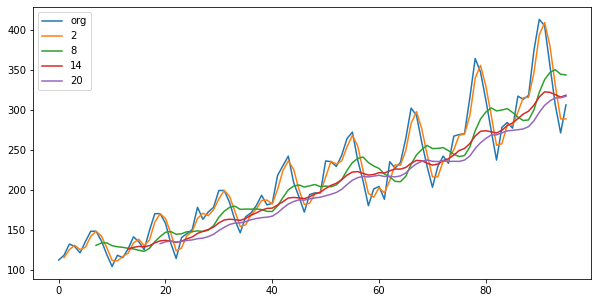

In [12]:
plt.figure(figsize = (10,5))
airline_data.Passengers.plot(label = 'org')
for i in range(2,24,6):
    airline_data['Passengers'].rolling(i).mean().plot(label = str(i))
plt.legend(loc = 'best');

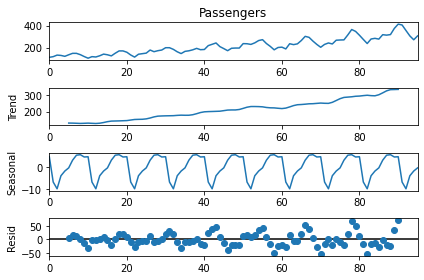

In [13]:
decompose_ts_add = seasonal_decompose(airline_data.Passengers, period = 10)
decompose_ts_add.plot();

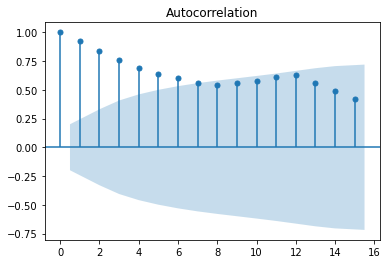

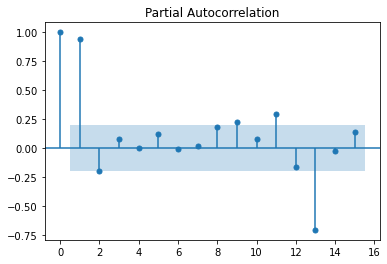

In [16]:
tsa_plots.plot_acf(airline_data.Passengers, lags = 15)
tsa_plots.plot_pacf(airline_data.Passengers, lags = 15);

### Building the Data driven Forecasting Models

In [17]:
train = airline_data.head(77)
test = airline_data.tail(19)

In [18]:
def RMSE(pred,org):
    temp = (np.sqrt(np.mean((np.array(org)-np.array(pred))**2)))
    return temp

#### Creating a Simple Exponential Data Driven Model

In [20]:
ses_model = SimpleExpSmoothing(train['Passengers']).fit(smoothing_level = 0.3)
pred_ses = ses_model.predict(start = test.index[0], end = test.index[-1])
rmse_ses = RMSE(pred_ses, test.Passengers)
rmse_ses

76.58414848256268

#### Creating a Holts Data Driven Model

In [21]:
hw_model = Holt(train['Passengers']).fit(smoothing_level = 0.8, smoothing_slope = 0.3)
pred_hw = hw_model.predict(start = test.index[0], end = test.index[-1])
rmse_hw = RMSE(pred_hw, test.Passengers)
rmse_hw

53.10237854882006

#### Creating Holts Winter Exponential with Additive Seasonality and Additive Trend

In [22]:
hwe_model_add_add = ExponentialSmoothing(train['Passengers'], seasonal = 'add', trend = 'add', seasonal_periods = 15).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0], end = test.index[-1])
rmse_hwe_add_add = RMSE(pred_hwe_add_add, test.Passengers)
rmse_hwe_add_add

50.138687431669695

#### Creating Holts Winter Exponential with Multiplicative Seasonality and Additive Trend

In [23]:
hwe_model_mul_add = ExponentialSmoothing(train['Passengers'], seasonal = 'mul', trend = 'add', seasonal_periods = 12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0], end = test.index[-1])
rmse_hwe_mul_add = RMSE(pred_hwe_mul_add, test.Passengers)
rmse_hwe_mul_add

30.908902840680653

In [24]:
table = {'Model' : pd.Series(['Simple Exponential', 'Holts Model', 'Holts add sea add trend', 'Holts mul sea add trend']), 'RMSE Values' : [rmse_ses, rmse_hw, rmse_hwe_add_add, rmse_hwe_mul_add]}
table = pd.DataFrame(table)
table

,Model,RMSE Values
0,Simple Exponential,76.584148
1,Holts Model,53.102379
2,Holts add sea add trend,50.138687
3,Holts mul sea add trend,30.908903


In [25]:
hwe_model_mul_add_new = ExponentialSmoothing(airline_data['Passengers'], seasonal = 'mul', trend = 'add', seasonal_periods = 12).fit()

In [26]:
hwe_model_mul_add_new.forecast(10)

96     312.899483
97     308.172137
98     355.532626
99     345.771258
100    345.697121
101    392.471492
102    436.502350
103    429.860359
104    380.174318
105    332.318757
dtype: float64

## Conclusion

From the above models, the model with the lowest RMSE value is Holts Winter Exponential Smoothing with Multiplicative Seasonality and Additive Trend.
Thus, we use it to forecast the Airline Passengers ticket prices.